In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [16]:
data = pd.read_csv("C:\\Users\\user\\Documents\\buys_comp_dataset.csv")
data


,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes


In [17]:

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
data["buys_computer"] = encoder.fit_transform(data["buys_computer"])
data["credit_rating"] = encoder.fit_transform(data["credit_rating"])
data["income"] = encoder.fit_transform(data["income"])
data["age"] = encoder.fit_transform(data["age"])
data["student"] = encoder.fit_transform(data["student"])


data



,age,income,student,credit_rating,buys_computer
0,1,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,1
3,2,2,0,1,1
4,2,1,1,1,1
5,2,1,1,0,0
6,0,1,1,0,1
7,1,2,0,1,0
8,1,1,1,1,1


In [18]:
# A1
from sklearn.tree import DecisionTreeClassifier  
  
for i in range(4):
    train_features = data.iloc[:6,i].values.reshape(-1,1)  
    test_features = data.iloc[6:,i].values.reshape(-1,1)
    train_targets = data.iloc[:6,-1]  
    test_targets = data.iloc[6:,-1]  
    
    tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)  
    
    prediction = tree.predict(test_features)  
    
    print("The prediction accuracy for",i,"th column is: ",tree.score(test_features,test_targets)*100,"%")

The prediction accuracy for 0 th column is:  66.66666666666666 %
The prediction accuracy for 1 th column is:  0.0 %
The prediction accuracy for 2 th column is:  33.33333333333333 %
The prediction accuracy for 3 th column is:  33.33333333333333 %


In [19]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

def InfoGain(data,split_attribute_name,target_name="class"):
    tot_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    Information_Gain = tot_entropy - Weighted_Entropy
    return Information_Gain

In [20]:
print("The information gain for age is", InfoGain(data,"age","buys_computer"))
print("The information gain for age is", InfoGain(data,"income","buys_computer"))
print("The information gain for age is", InfoGain(data,"student","buys_computer"))
print("The information gain for age is", InfoGain(data,"credit_rating","buys_computer"))


The information gain for age is 0.3244093931715556
The information gain for age is 0.10218717094933338
The information gain for age is 0.09109100760379174
The information gain for age is 0.07278022578373267


In [21]:
train_features = data.iloc[:6,i].values.reshape(-1,1)  
test_features = data.iloc[6:,i].values.reshape(-1,1)

train_targets = data.iloc[:6,-1]  
test_targets = data.iloc[6:,-1] 

model = DecisionTreeClassifier()
model = model.fit(train_features,train_targets)
print("Accuracy of the model: ",model.score(train_features,train_targets))

Accuracy of the model:  0.8333333333333334


In [22]:
print("Tree Depth: ",model.get_depth())

Tree Depth:  1


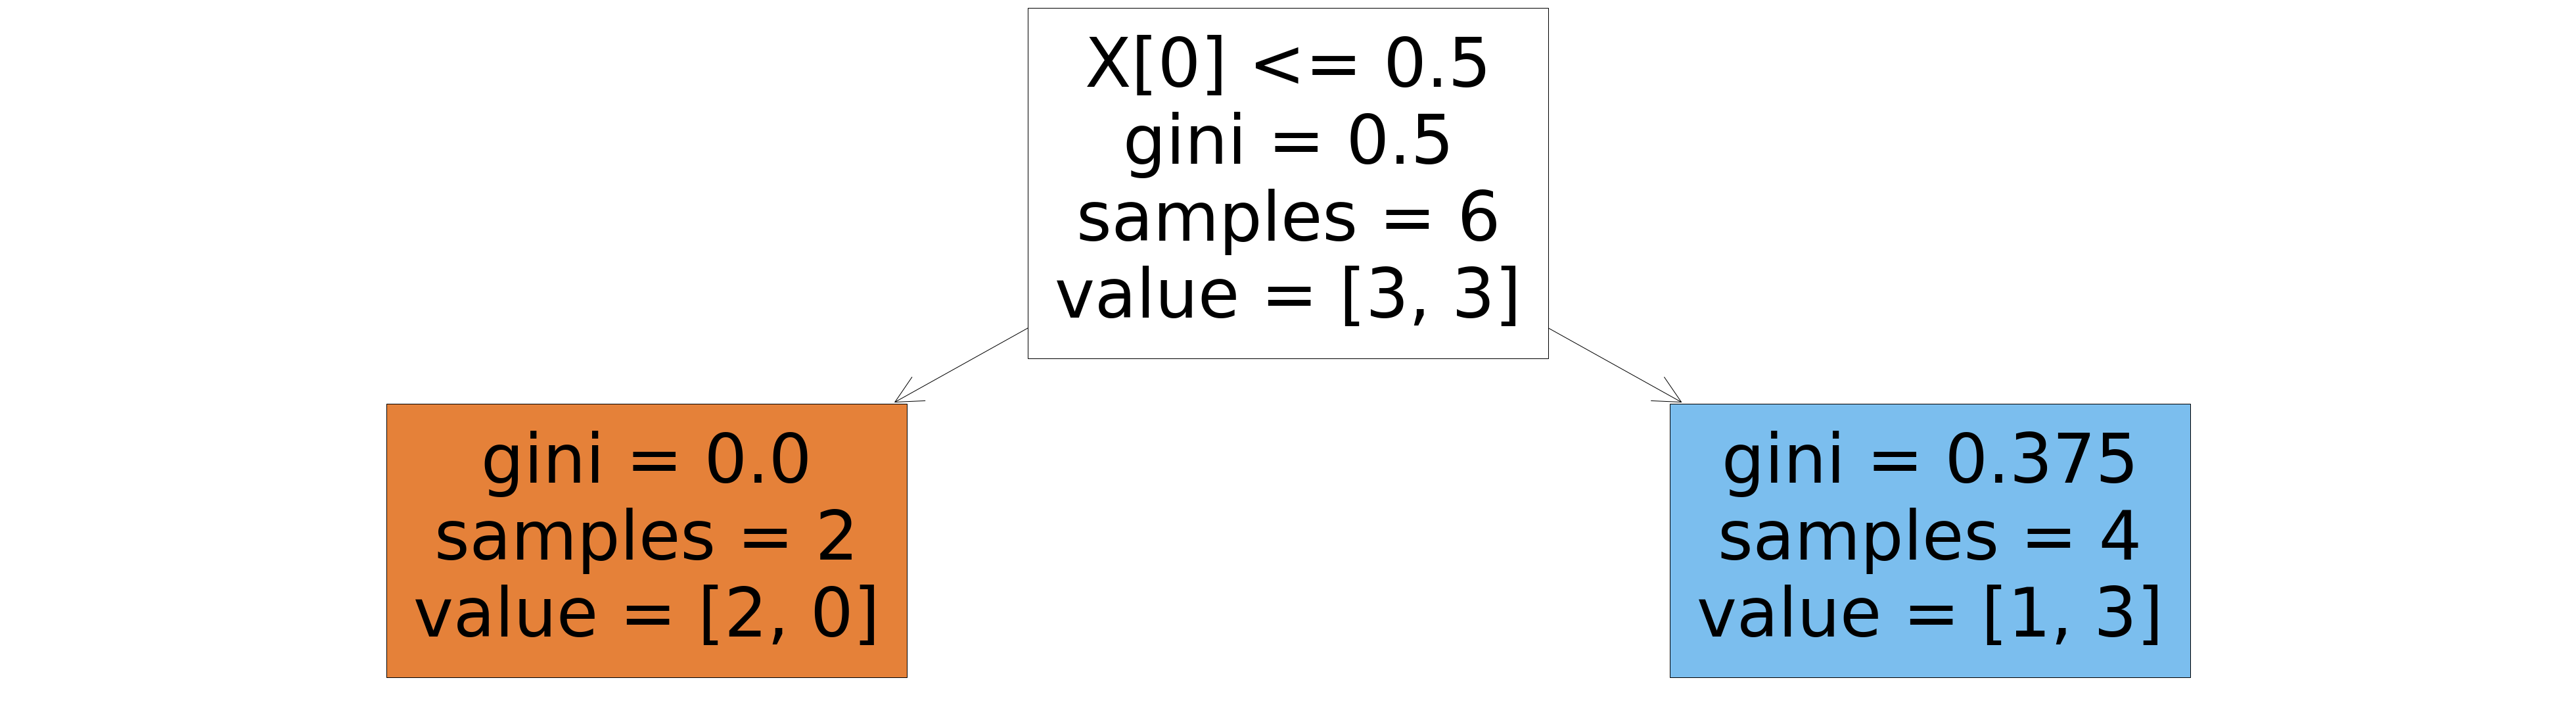

In [23]:
# A3

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,20))

plot_tree(model, filled=True)
plt.show()

In [24]:
# A4
df_train=pd.read_csv(r"C:\Users\user\Downloads\lab3\lab3\data\train_data.csv")
df_test=pd.read_csv(r"C:\Users\user\Downloads\lab3\lab3\data\test_data.csv")

In [25]:
df_train.drop(['Timestamp'], axis=1, inplace=True)
df_test.drop(['Timestamp'], axis=1, inplace=True)


In [26]:
df_train['Class']=df_train['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[0, 0, 1])
df_test['Class']=df_test['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[0, 0, 1])

In [27]:
X_train = df_train[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
X_test = df_test[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
y_train = df_train[['Class']].values.ravel()
y_test = df_test[['Class']].values.ravel()

In [28]:
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test, y_test))


1.0
0.6183527885862516


0.7587548638132295


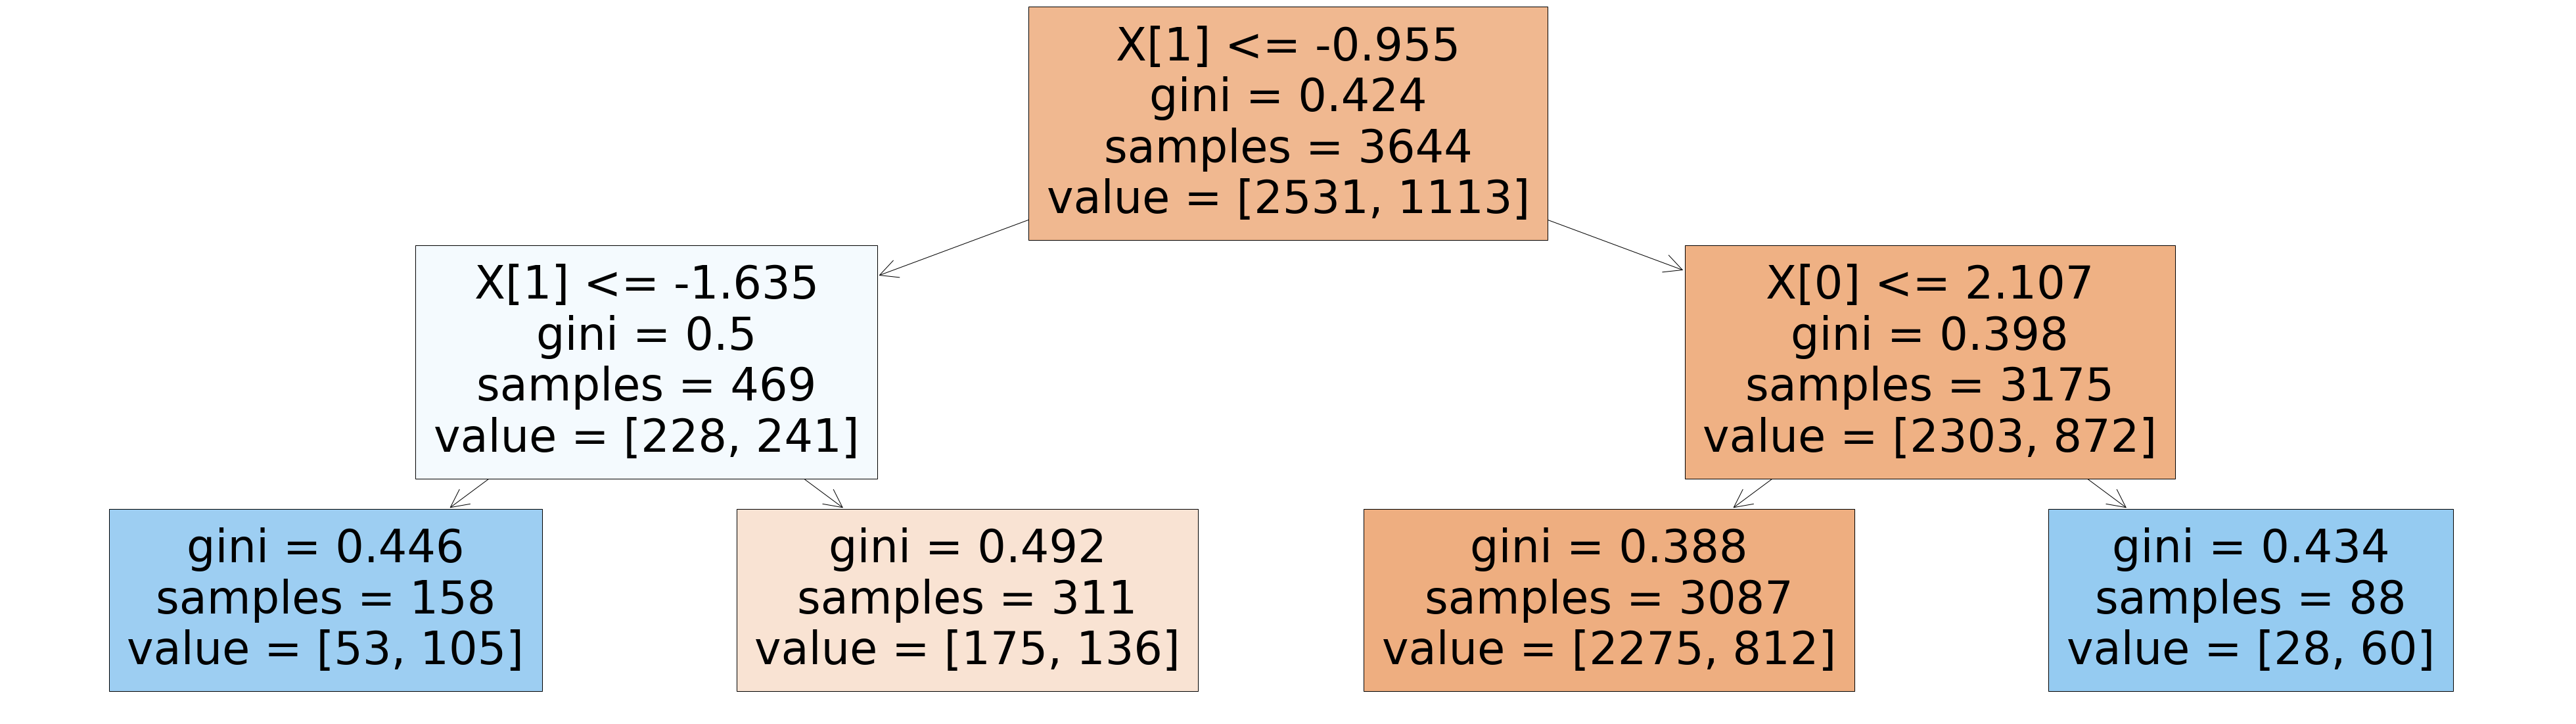

In [34]:
import matplotlib.pyplot as pltfrom 
from sklearn import tree
from sklearn.tree import plot_tree


model_new = DecisionTreeClassifier(max_depth=5)
model_new = DecisionTreeClassifier(max_depth=2)
model_new = model_new.fit(X_train,y_train)
print(model_new.score(X_test, y_test))
plt.figure(figsize=(70,20))
plot_tree(model_new, filled=True)
plt.show()

1.0


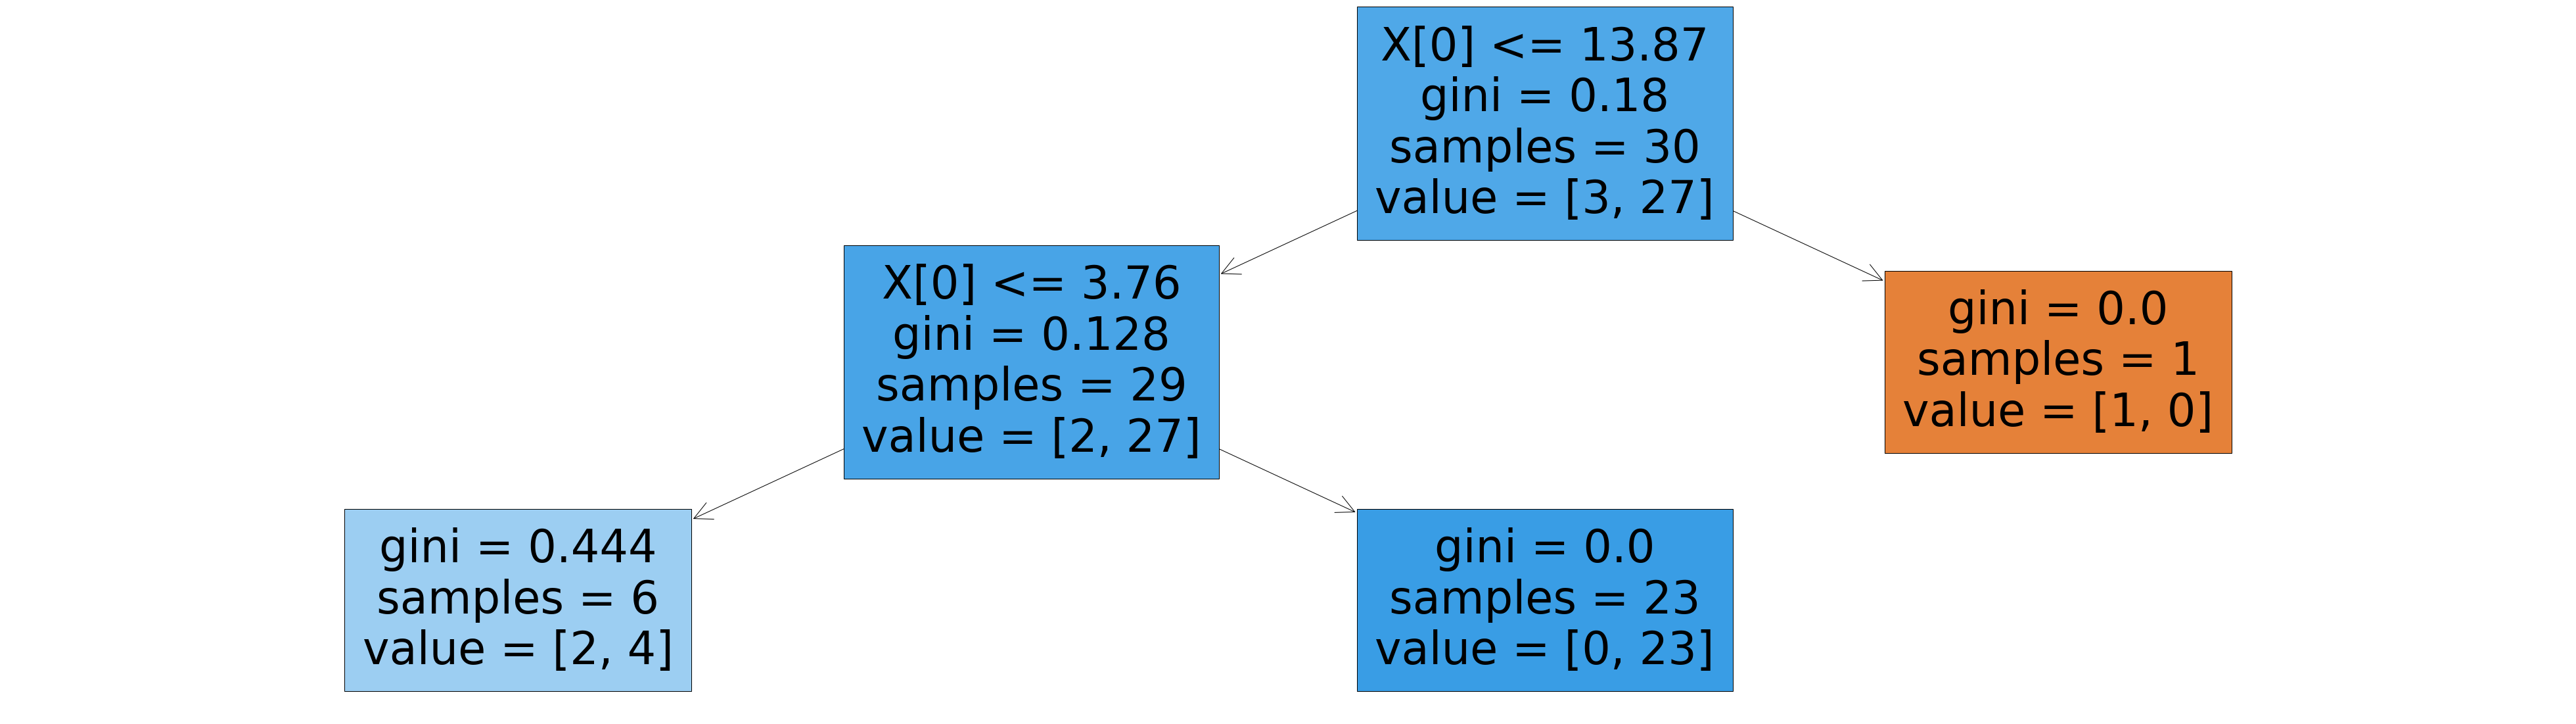

In [27]:
# A5
model_A5 = DecisionTreeClassifier(max_depth=2)
model_A5 = model_A5.fit(X_train,y_train)
print(model_A5.score(X_test, y_test))
plt.figure(figsize=(70,20))
from sklearn.tree import plot_tree
plot_tree(model_A5, filled=True)
plt.show()

0.6416990920881972


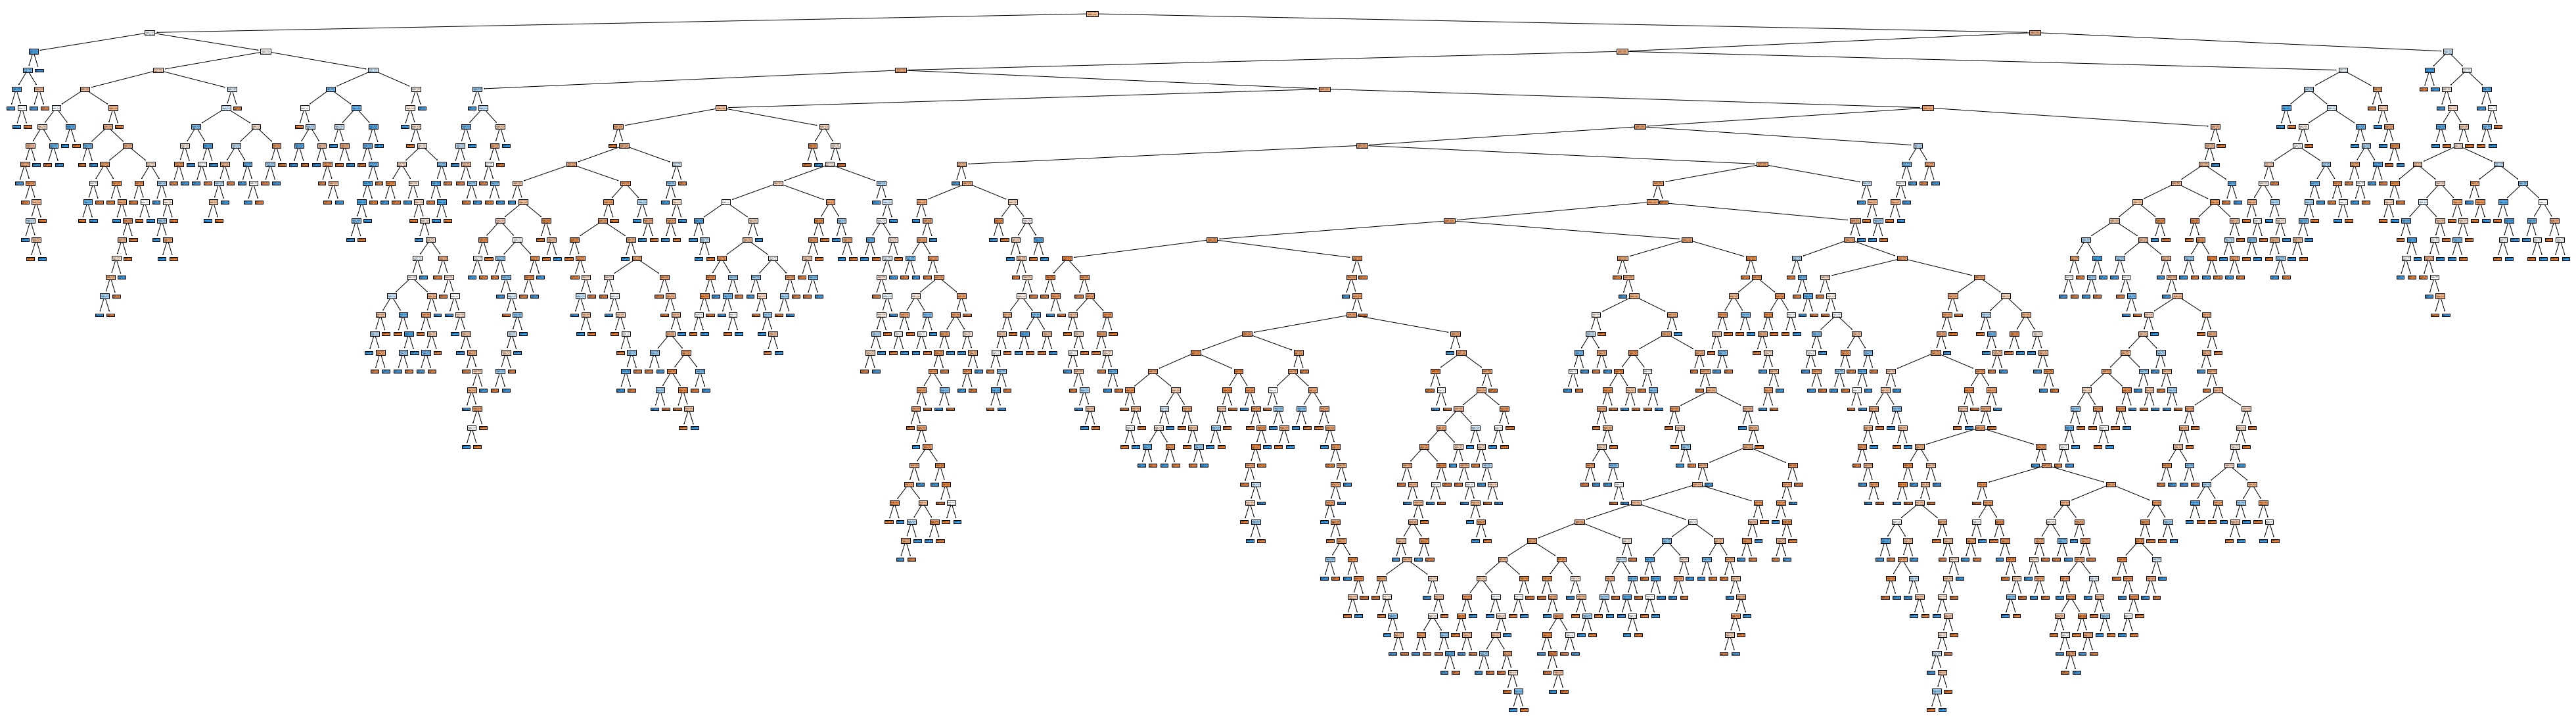

In [37]:
# A6
from sklearn.tree import plot_tree
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy = model_entropy.fit(X_train,y_train)
print(model_entropy.score(X_test, y_test))
plt.figure(figsize=(70,20))

plot_tree(model_entropy, filled=True)
plt.show()